<a href="https://colab.research.google.com/github/Deykoz/Machine-Learning-projects/blob/main/TensorFlow_DL_CNN_Cifar_10_bis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is the second part of the TensorFlow DL CNN Cifar-10.ipynb where I try to play with other parameter of the mode.

In [ ]:
import tensorflow as tf
from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

print("train images shape : ",train_images.shape)
print("train labels shape : ",train_labels.shape)
print("test images shape : ",test_images.shape)
print("test labels shape : ",test_labels.shape)

train images shape :  (50000, 32, 32, 3)
train labels shape :  (50000, 1)
test images shape :  (10000, 32, 32, 3)
test labels shape :  (10000, 1)


# **Use of Batch Normalization, LeakyRELU and Dropout**

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Rescaling(1./255),

    keras.layers.Conv2D(filters=32, kernel_size=(3,3)),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3)),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Conv2D(filters=128, kernel_size=(3,3)),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
callbacks= [ keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=callbacks)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 70ms/step - accuracy: 0.3037 - loss: 2.1622 - val_accuracy: 0.4645 - val_loss: 1.5157
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 69ms/step - accuracy: 0.4856 - loss: 1.4291 - val_accuracy: 0.5427 - val_loss: 1.2571
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 68ms/step - accuracy: 0.5442 - loss: 1.2794 - val_accuracy: 0.5172 - val_loss: 1.3717
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 69ms/step - accuracy: 0.5891 - loss: 1.1682 - val_accuracy: 0.6038 - val_loss: 1.1303
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 69ms/step - accuracy: 0.6153 - loss: 1.0963 - val_accuracy: 0.6508 - val_loss: 0.9753
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 69ms/step - accuracy: 0.6307 - loss: 1.0467 - val_accuracy: 0.6752 - val_loss: 0.9221
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 70ms/step - accuracy: 0.6484 - loss: 1.0024 - val_accuracy: 0.5678 - val_loss: 1.3013
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 68ms/step - accuracy: 0.

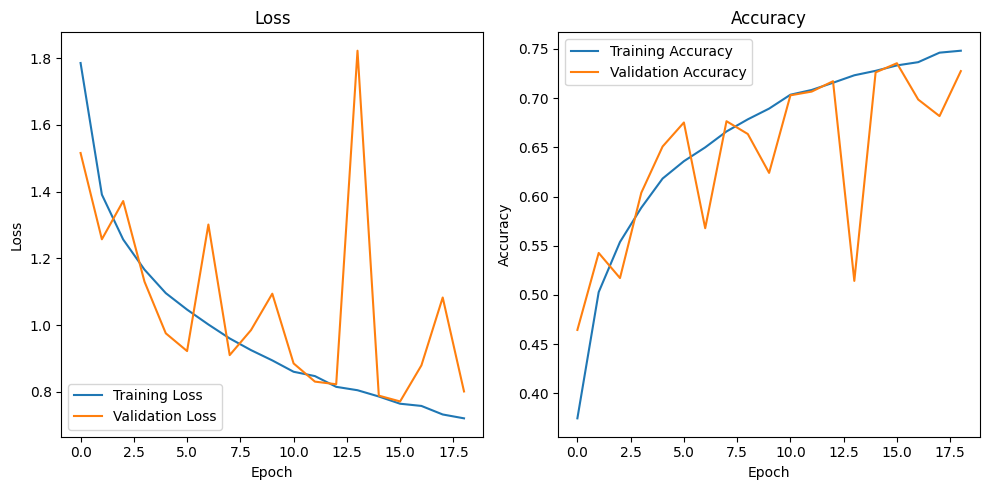

In [ ]:
# prompt: plot the loss and accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
# prompt: Evaluate the model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


313/313 - 5s - 17ms/step - accuracy: 0.7334 - loss: 0.7729
Test Loss: 0.7729081511497498
Test Accuracy: 0.7333999872207642


# **TEST augmented data + model 3**

The model I refer to as 'model 3' is the CNN configuration used in the file 'TensorFlow DL CNN Cifar-10.ipynb'.

In [1]:
import tensorflow as tf
from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

print("train images shape : ",train_images.shape)
print("train labels shape : ",train_labels.shape)
print("test images shape : ",test_images.shape)
print("test labels shape : ",test_labels.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
train images shape :  (50000, 32, 32, 3)
train labels shape :  (50000, 1)
test images shape :  (10000, 32, 32, 3)
test labels shape :  (10000, 1)


In [ ]:
model3 = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Rescaling(1./255), #To normalize between 0 and 1

    #Convolutional part
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))

    #fully connected part
    ,keras.layers.Flatten()
    ,keras.layers.Dropout(rate=0.3)
    ,keras.layers.Dense(units=256, activation='relu') #256 neurones
    ,keras.layers.Dropout(rate=0.3)
    ,keras.layers.Dense(units=10, activation='softmax') # output layer of 10 units

    #use softmax because multicalss problem with unique label

        ])
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()



Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_10 (Rescaling)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,146 (887.29 KB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)

If I use the EarlyStopping callback, it might be terminating the training early if it doesn’t see improvement in validation loss or accuracy. This is controlled by the patience parameter.

If the model's validation accuracy or loss does not improve after a few epochs, the EarlyStopping callback will stop the training early.
SO i decided to increase the patience of the EarlyStopping callback.

**Generation of New data**

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Create your ImageDataGenerator instance
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the ImageDataGenerator on the training data only
datagen.fit(train_images)

Let's see the result of the generation

<function matplotlib.pyplot.show(close=None, block=None)>

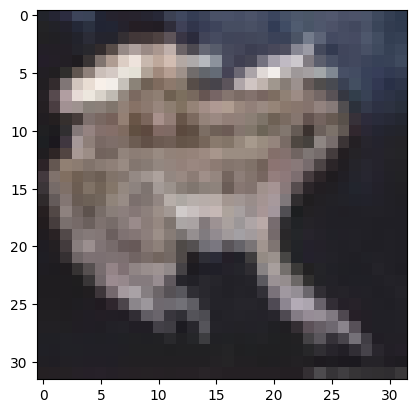

In [8]:
import matplotlib.pyplot as plt
image=train_images[0]
plt.imshow(image)
plt.show

Here is the image without modification

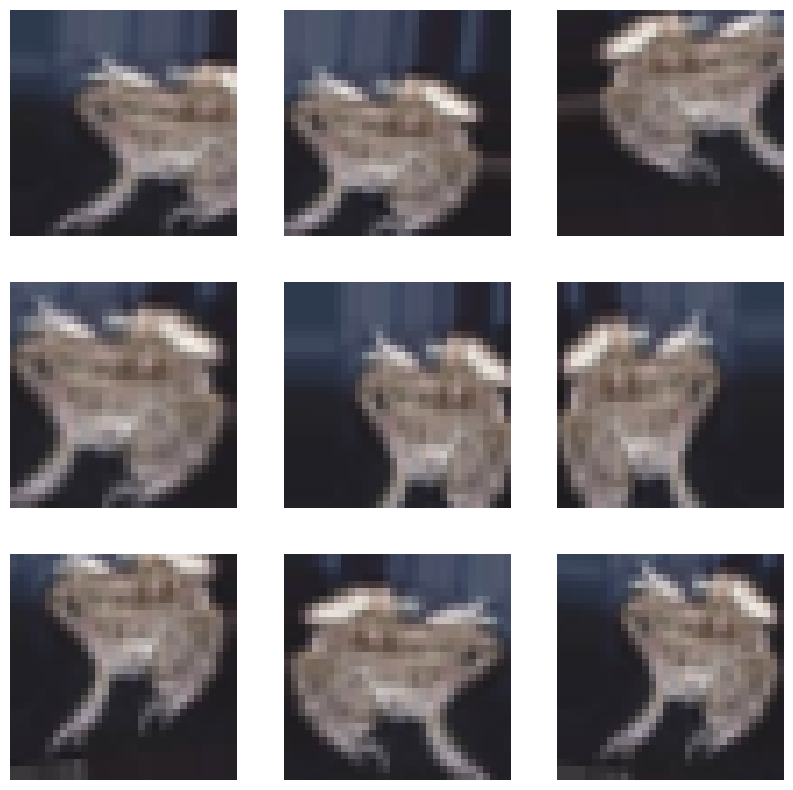

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Let's see for the first image
image = train_images[0]

# Reshape the image as (1, height, width, channels)
image = np.expand_dims(image, axis=0)  # shape (1, 32, 32, 3)

# We will generate 9 augmented images
augmented_images = datagen.flow(image, batch_size=9)

# plot
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i in range(9):
    augmented_image = next(augmented_images)[0].astype('uint8')


    axes[i].imshow(augmented_image)
    axes[i].axis('off')

plt.show()


We can see the effect of the augmented data on this image

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Create your ImageDataGenerator instance
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the ImageDataGenerator on the training data only
datagen.fit(train_images)
callbacks= [ keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
# Now fit your model using the augmented data and the separate validation set
history2 = model3.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    epochs=50,
    validation_data=(val_images, val_labels),  # Use separate validation data
    callbacks=callbacks
)

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 71s 70ms/step - accuracy: 0.4131 - loss: 1.6135 - val_accuracy: 0.5106 - val_loss: 1.3328
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 77s 65ms/step - accuracy: 0.4524 - loss: 1.5098 - val_accuracy: 0.5639 - val_loss: 1.2426
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 70s 70ms/step - accuracy: 0.4872 - loss: 1.4387 - val_accuracy: 0.5716 - val_loss: 1.1931
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.5039 - loss: 1.3814 - val_accuracy: 0.5706 - val_loss: 1.1927
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - accuracy: 0.5163 - loss: 1.3436 - val_accuracy: 0.5794 - val_loss: 1.1826
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 68s 67ms/step - accuracy: 0.5278 - loss: 1.3186 - val_accuracy: 0.6024 - val_loss: 1.1153
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 80s 65ms/step - accuracy: 0.5440 - loss: 1.2853 - val_accuracy: 0.6334 - val_loss: 1.0303
Epoch 8/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.5563 -

The results are lower that expected

# **model 6 with another optmizer 'rmsprop' instead of Adam**

The model I refer to as 'model 6' is the CNN configuration used in the file 'TensorFlow DL CNN Cifar-10.ipynb'.

In [ ]:
import tensorflow as tf
from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [ ]:
model63 = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Rescaling(1./255), #To normalize between 0 and 1

    #Convolutional part
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))

    #fully connected part
    ,keras.layers.Flatten()
    ,keras.layers.Dropout(rate=0.3)
    ,keras.layers.Dense(units=512, activation='relu') #256 neurones
    ,keras.layers.Dropout(rate=0.3)
    ,keras.layers.Dense(units=10, activation='softmax') # output layer of 10 units

    #use softmax because multicalss problem with unique label

        ])
model63.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model63.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_11 (Rescaling)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,034 (1.38 MB)

 Trainable params: 361,034 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks= [ keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
history63 = model63.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=callbacks)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 52ms/step - accuracy: 0.3027 - loss: 1.8782 - val_accuracy: 0.5276 - val_loss: 1.3146
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 49ms/step - accuracy: 0.5285 - loss: 1.3182 - val_accuracy: 0.5605 - val_loss: 1.2267
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.5990 - loss: 1.1405 - val_accuracy: 0.6035 - val_loss: 1.1200
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.6374 - loss: 1.0347 - val_accuracy: 0.6768 - val_loss: 0.9381
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 50ms/step - accuracy: 0.6672 - loss: 0.9584 - val_accuracy: 0.6738 - val_loss: 0.9516
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 49ms/step - accuracy: 0.6816 - loss: 0.9355 - val_accuracy: 0.6862 - val_loss: 0.9278
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.6916 - loss: 0.8983 - val_accuracy: 0.6751 - val_loss: 0.9988
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.7101 -

In [ ]:
test_loss, test_acc = model63.evaluate(test_images, test_labels, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

313/313 - 6s - 19ms/step - accuracy: 0.7043 - loss: 0.8917
Test Loss: 0.8917426466941833
Test Accuracy: 0.7042999863624573


# **Impact of the dropout on the basic model**

In [ ]:
model2 = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Rescaling(1./255), #To normalize between 0 and 1

    #Convolutional part
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))

    #fully connected part
    ,keras.layers.Flatten()
    ,keras.layers.Dropout(rate=0.3)
    ,keras.layers.Dense(units=256, activation='relu') #256 neurones
    ,keras.layers.Dropout(rate=0.3)
    ,keras.layers.Dense(units=10, activation='softmax') # output layer of 10 units

    #use softmax because multicalss problem with unique label

        ])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

from os import path
callbacks2= [ keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
history2 = model2.fit(train_images, train_labels, epochs=50, validation_split=0.2)

In [ ]:
test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

313/313 - 5s - 17ms/step - accuracy: 0.7111 - loss: 0.8590
Test Loss: 0.8590461015701294
Test Accuracy: 0.7110999822616577


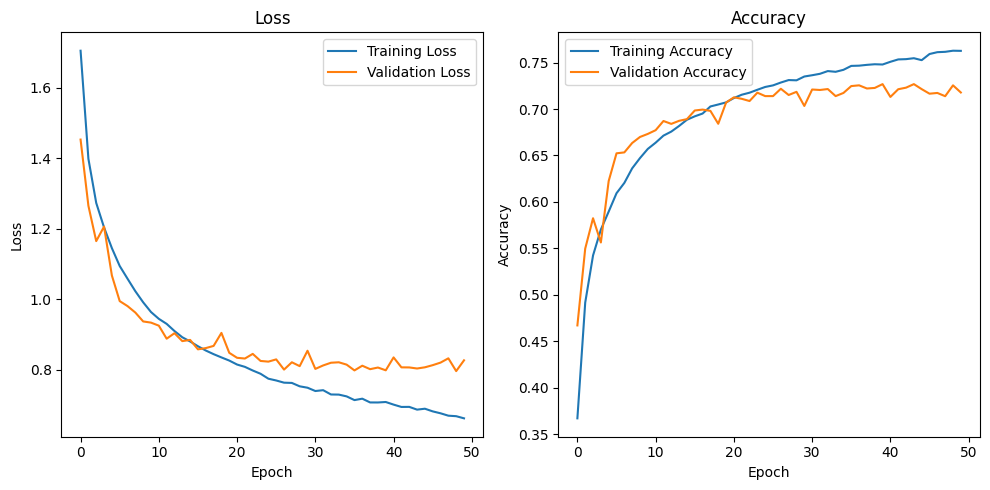

In [ ]:
# prompt: plot the loss and accuracy

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

**Comments :**

We can see that is way better than the previous version because the curve are way closer of each other.
The training and validation loss are gradually decreasing.

We can notice that it takes a lot longer we went from 11 epcochs to over 20 epochs.

We can see a slight increase in the accuracy too.
We can see a much better test loss than before.